# **Clasificación de setas**

En este proyecto, examinaremos los datos y crearemos un algoritmo de aprendizaje automático que detectará si la seta es comestible o venenosa por sus especificaciones como la forma del sombrero, el color del sombrero, el color de las branquias, etc, utilizando diferentes clasificadores.

El conjunto de datos utilizado en este proyecto están en este enlace [https://raw.githubusercontent.com/kanchitank/Mushroom-Classification/master/mushrooms.csv](https://raw.githubusercontent.com/kanchitank/Mushroom-Classification/master/mushrooms.csv)  que contiene 8124 instancias de setas con 23 características como la forma del sombrero, la superficie del sombrero, el color del sombrero, los hematomas, el olor, etc, y está disponible en UCI Machine Learning.

#Librerias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample


from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from IPython.display import Image
import graphviz

import pickle


#2. Carga de datos

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/kanchitank/Mushroom-Classification/master/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# 3. Descripción de los datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df.shape

(8124, 23)

In [7]:
for colum in df.columns:
  print(colum)
  print(df[colum].value_counts())

class
class
e    4208
p    3916
Name: count, dtype: int64
cap-shape
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64
cap-surface
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64
cap-color
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64
bruises
bruises
f    4748
t    3376
Name: count, dtype: int64
odor
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64
gill-attachment
gill-attachment
f    7914
a     210
Name: count, dtype: int64
gill-spacing
gill-spacing
c    6812
w    1312
Name: count, dtype: int64
gill-size
gill-size
b    5612
n    2512
Name: count, dtype: int64
gill-color
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64
stalk-shape
stalk-shape
t   

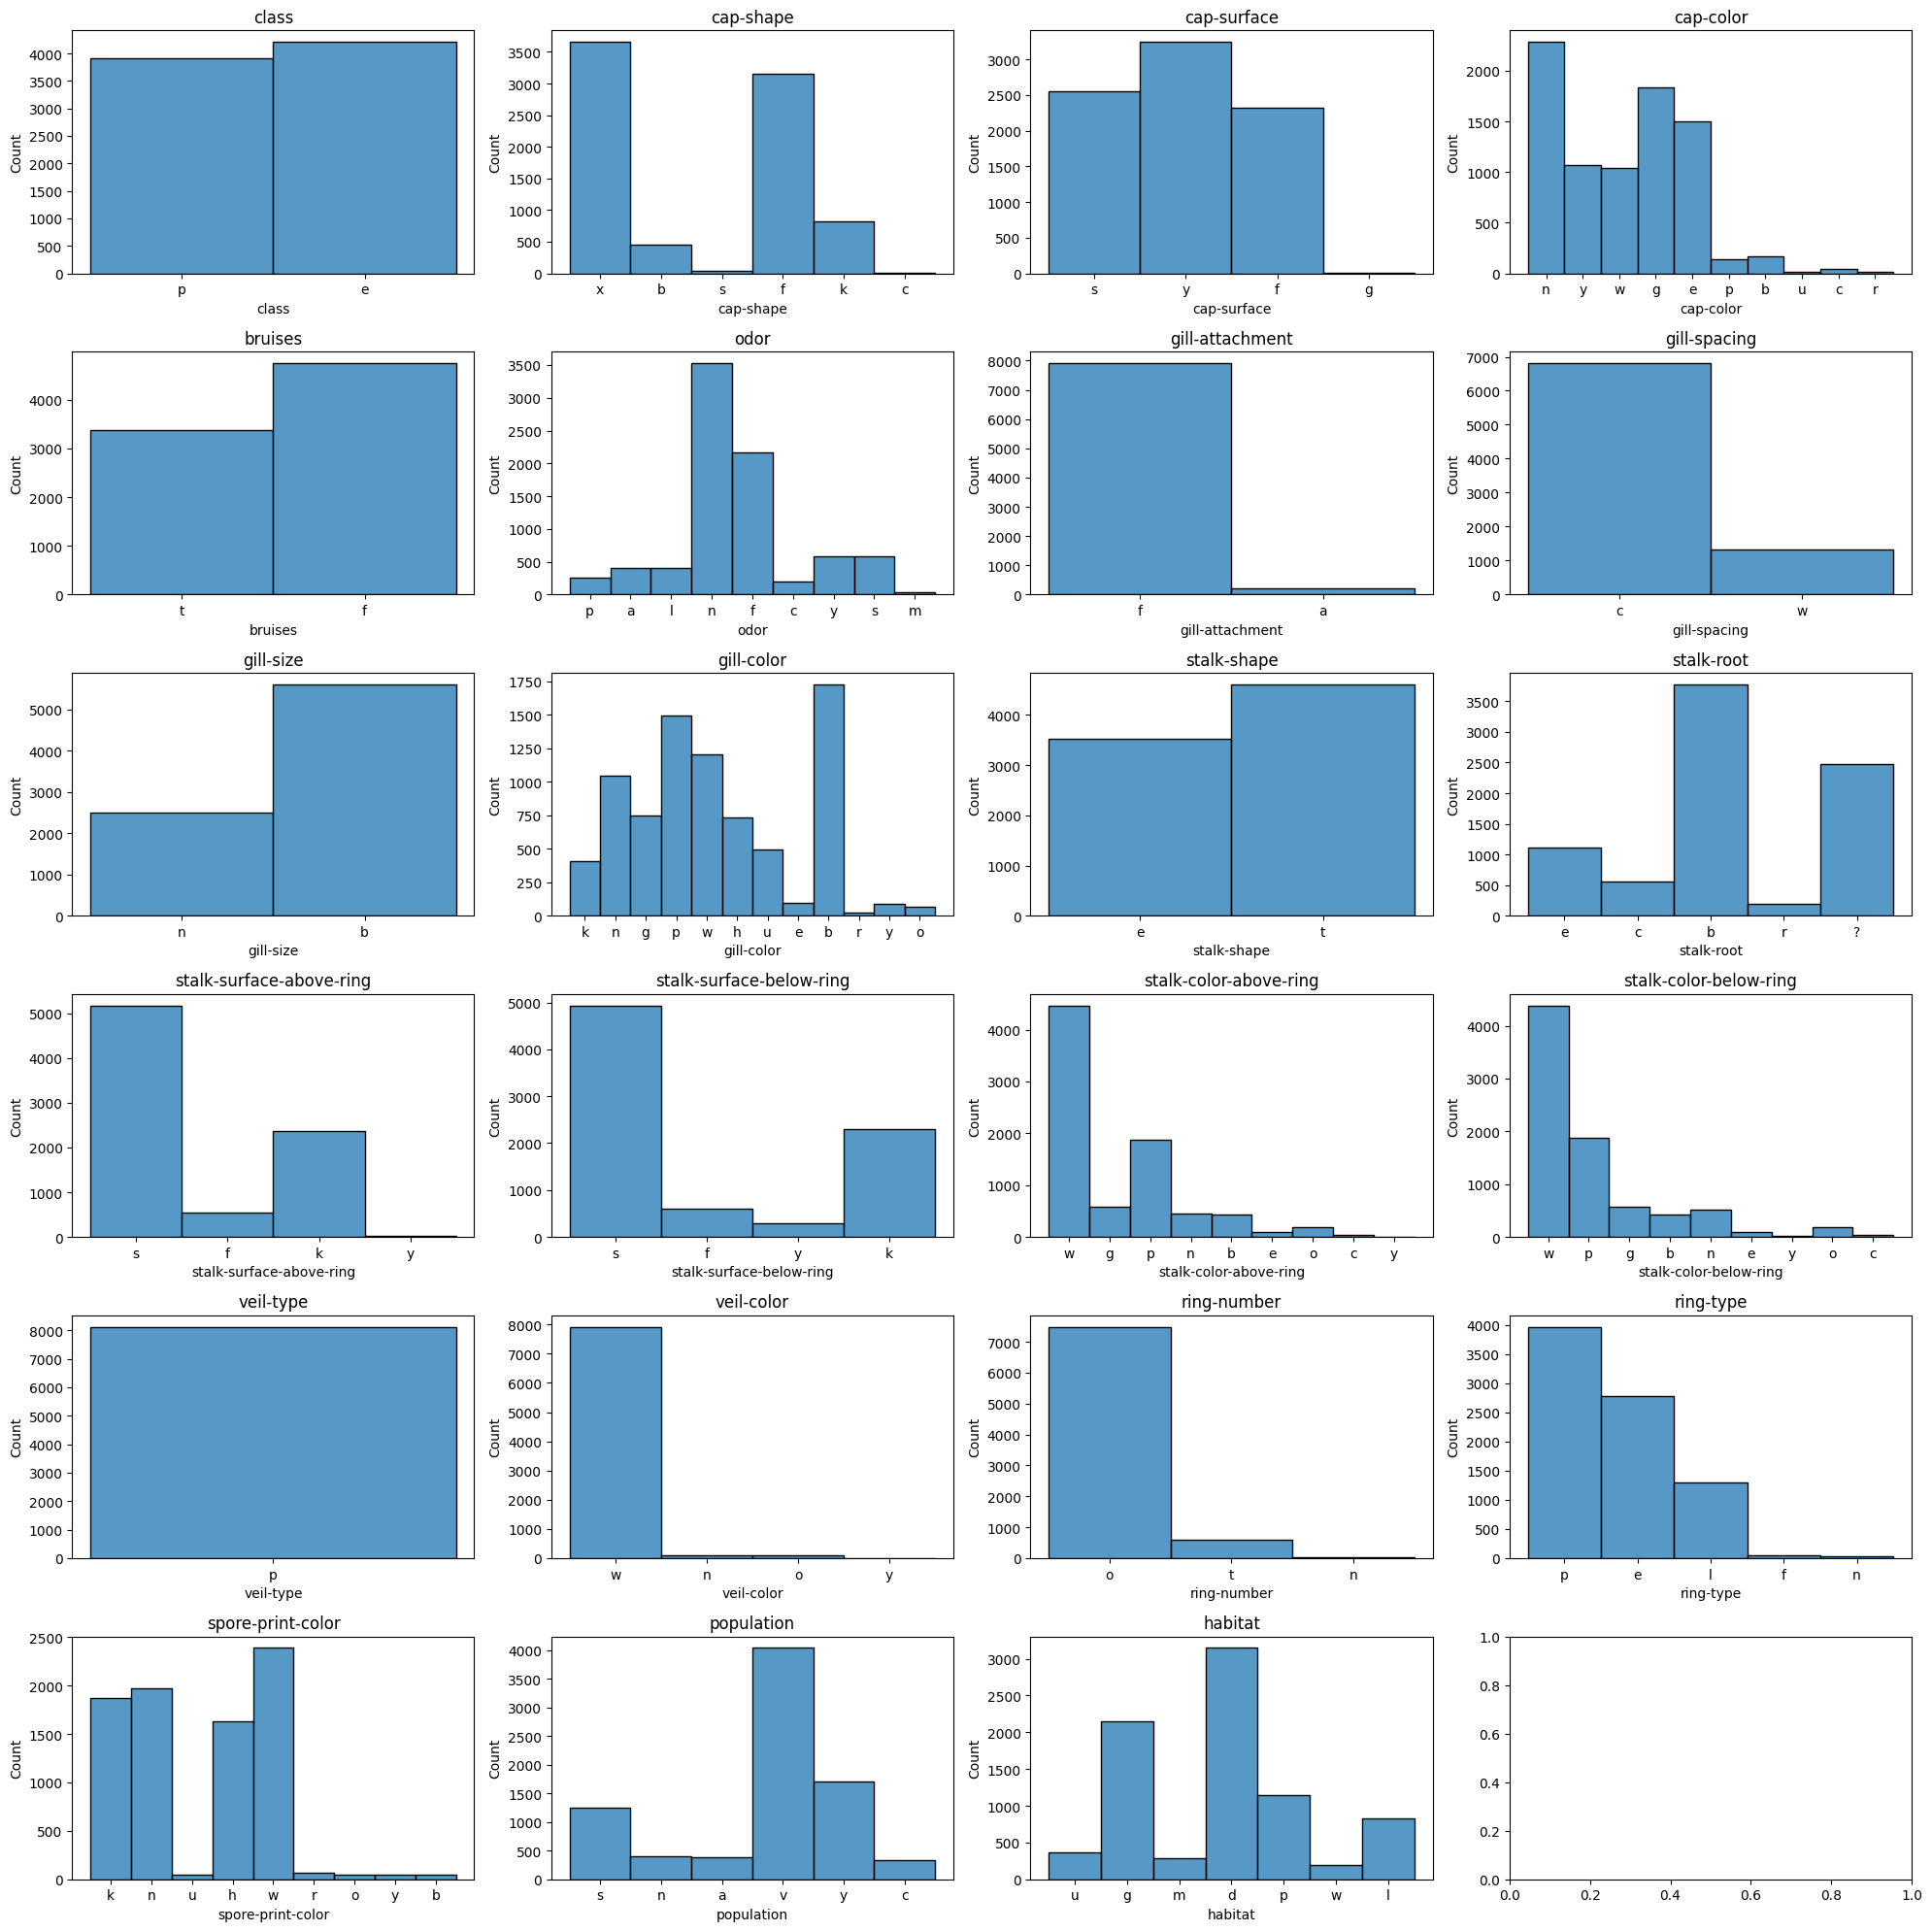

In [8]:
#@title Gráficos de barras
fig, ax = plt.subplots(6,4, figsize=(20, 20))
ax = ax.flatten()  # Aplanar la matriz de ejes para indexarlos fácilmente

for i, col in enumerate(df.columns):
    sns.histplot(data=df[col], ax=ax[i])
    ax[i].set_title(col)
    if i == 23:
        break
fig.tight_layout()
plt.show()

# 4. Transformación







##LabelEncoder para obtener valores numéricos en las columnas categóricas.


In [10]:
df_category = df.copy()
le = LabelEncoder()
encoders = {}
for col in df_category.columns:
    df_category[col] = le.fit_transform(df_category[col])
    encoders[col] = le.classes_

In [11]:
df_category.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1


##Eliminar columnas con una sola categoría

In [12]:
#columnas con una sola clase
for val in encoders:
  if len (encoders[val])<=1:
    print (val, encoders[val])

veil-type ['p']


In [13]:
df_category= df_category.drop(columns=['veil-type'])

##Balancear las clases (Resample)

In [15]:
df_category['class'].value_counts()

,count
class,
0,4208
1,3916


In [16]:
class_0 = df_category[df_category['class']==0]
class_1 = df_category[df_category['class']==1]
class_0 = resample(class_0, replace=False, n_samples=len(class_1), random_state=42)
df_category = pd.concat([class_0, class_1])
df_category['class'].value_counts()

,count
class,
0,3916
1,3916


# 5. Correlación y varianza

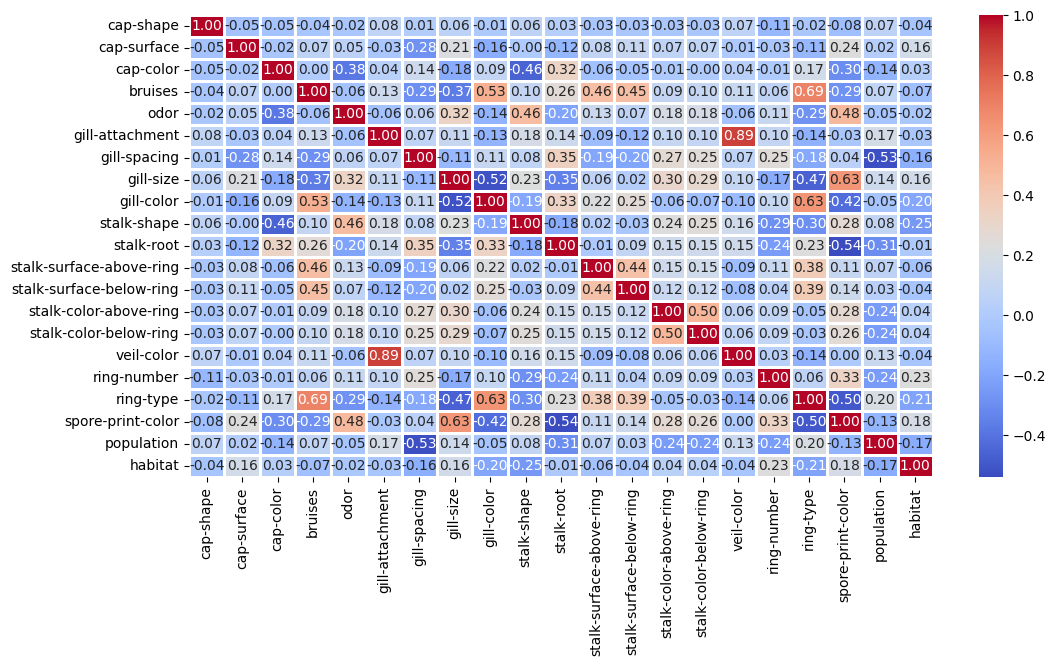

In [17]:
#@title Matriz de correlación
plt.figure(figsize=(12, 6))
sns.heatmap(df_category.drop(columns=['class']).corr(),
			cmap='coolwarm',
			fmt='.2f',
			linewidths=2,
			annot=True)
plt.show()

##PCA manteniendo la varianza acumulada en un 95 %.

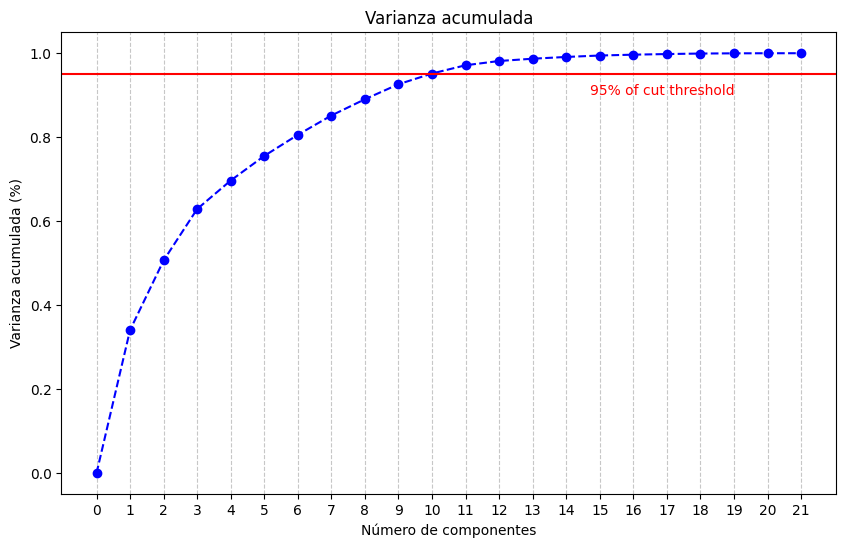

In [18]:
#@title Elección del número de componentes
#Aplicar PCA
df_category_X = df_category.drop(columns=['class'])
pca = PCA(n_components = 21)
X21D = pca.fit_transform(df_category_X)

#Guardar Varianzas para graficar Elección de componentes en PCA
varianzas_acomuladas = np.cumsum(pca.explained_variance_ratio_)
varianzas_acomuladas = np.insert(varianzas_acomuladas, 0, 0)
n_comp = np.arange(len(varianzas_acomuladas))

#Graficar
plt.figure(figsize=(10, 6))
plt.plot(n_comp, varianzas_acomuladas, 'bo--')
plt.axhline(y=0.95, color='r', linestyle='-')  # Línea horizontal en y=0.95
plt.text(x=max(n_comp) * 0.7, y=0.90, s="95% of cut threshold", color='r', fontsize=10)

plt.title('Varianza acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada (%)')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(range(min(n_comp), max(n_comp) + 1, 1))

plt.show()

In [19]:
#@title Aplicar PCA
pca_componentes = 11
pca = PCA(n_components = 11)
X11D = pca.fit_transform(df_category_X)

# 6. División datos (train / test)

In [20]:
X = X11D
y = np.array(df_category['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6265, 11), (1567, 11), (6265,), (1567,))

# 7. Clasificación

##**Decision Tree**

In [22]:
#@title Fit
params = {}
cv = 3
verbose = 1

dt = DecisionTreeClassifier(random_state=42)

dt = GridSearchCV(dt, params, cv=cv, verbose=verbose)
dt.fit(X_train, y_train)
dtc = dt.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


###Test

In [23]:
#@title Accuracy score
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)


0.98468410976388

In [ ]:
#@title Classificasion report
print(classification_report(y_test, y_pred, target_names=encoders['class']))

              precision    recall  f1-score   support

           e       0.99      0.98      0.98       776
           p       0.98      0.99      0.98       791

    accuracy                           0.98      1567
   macro avg       0.98      0.98      0.98      1567
weighted avg       0.98      0.98      0.98      1567



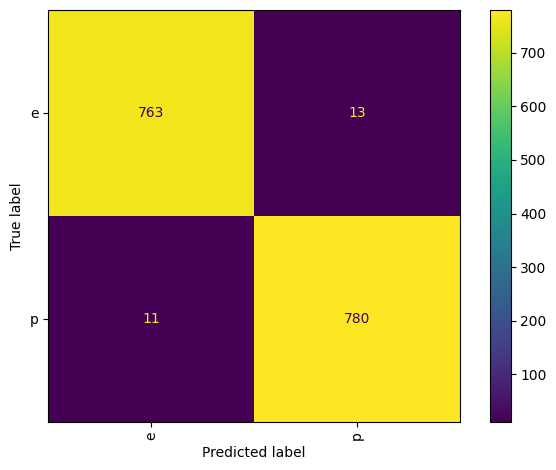

In [ ]:
#@title Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    dt, X_test, y_test, display_labels=encoders['class'], xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

###Ajuste hiperparámetros

In [ ]:
#@title Fit
params = {
    'max_depth': [3, 5, 10, None],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 5],  # Mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2', None]  # Número de características a considerar en cada split
}
cv = 5
verbose = 1

dt2 = DecisionTreeClassifier(random_state=42)

dt2 = GridSearchCV(dt2, params, cv=cv, verbose=verbose)
dt2.fit(X_train, y_train)

dt2c = dt.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


###Test

In [ ]:
#@title Accuracy score
y_pred = dt2c.predict(X_test)
accuracy_score(y_test, y_pred)

0.98468410976388

In [ ]:
#@title Classificasion report
print(classification_report(y_test, y_pred, target_names=encoders['class']))

              precision    recall  f1-score   support

           e       0.99      0.98      0.98       776
           p       0.98      0.99      0.98       791

    accuracy                           0.98      1567
   macro avg       0.98      0.98      0.98      1567
weighted avg       0.98      0.98      0.98      1567



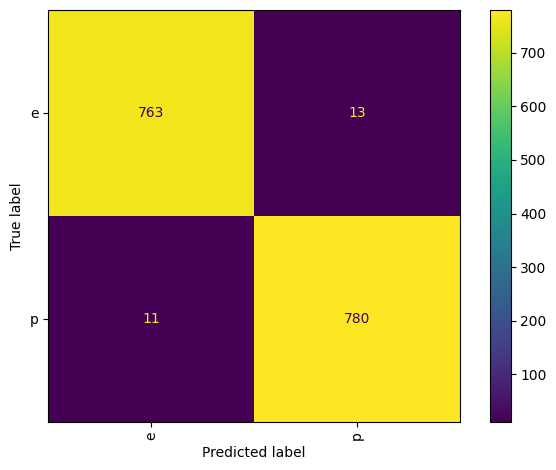

In [ ]:
#@title Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    dt2c, X_test, y_test, display_labels=encoders['class'], xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

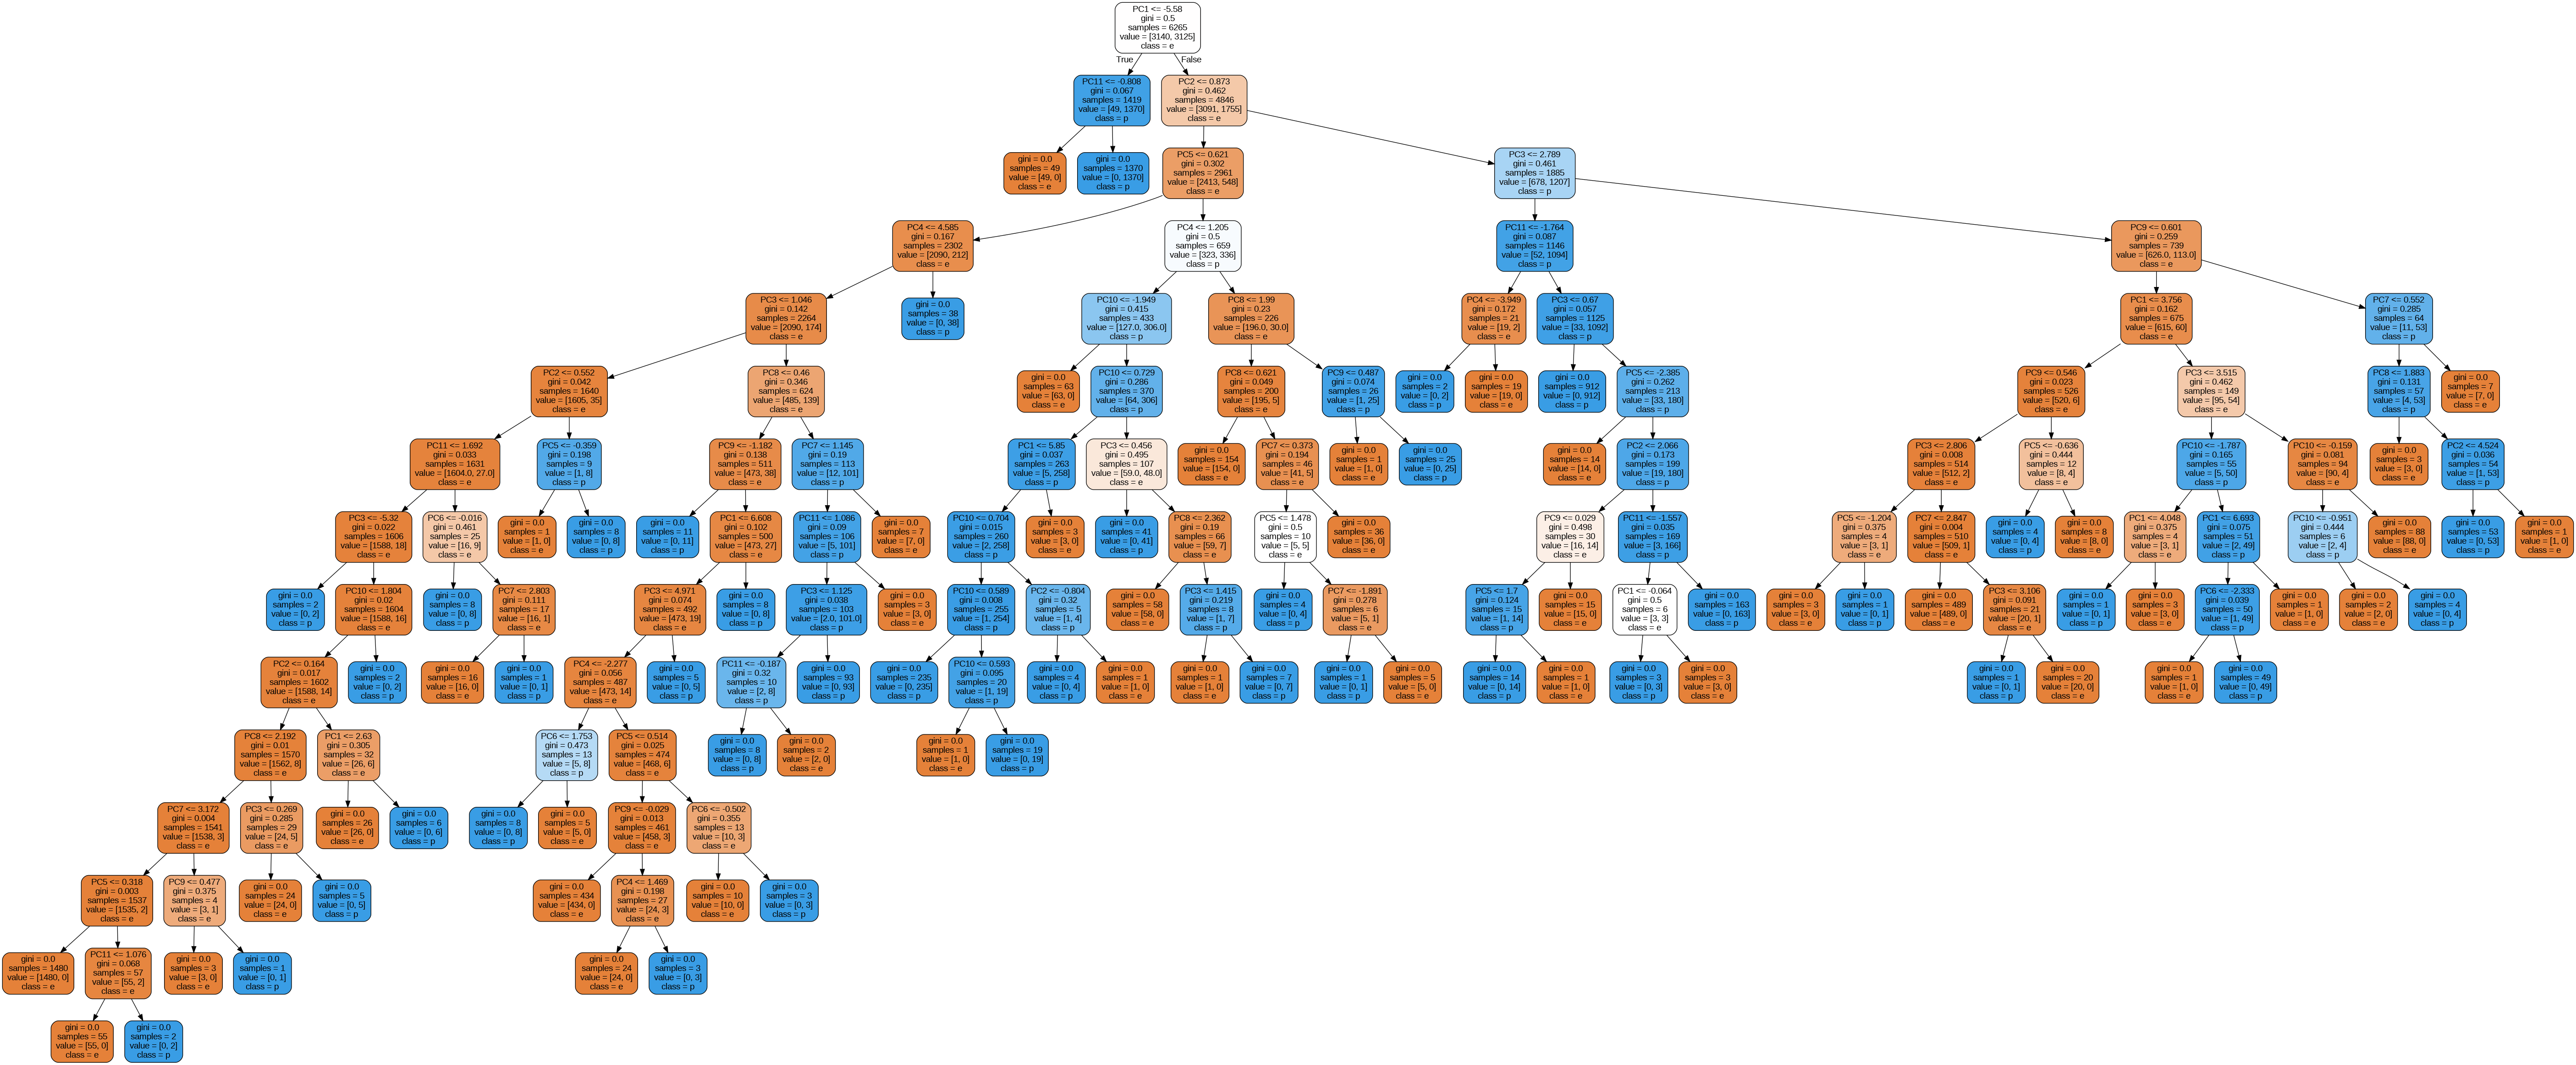

In [ ]:
#@title Graficar decision Tree
column_names = [f'PC{i+1}' for i in range(pca_componentes)]

export_graphviz(
            dt2c,
            out_file="dtc_.dot",
            feature_names=column_names,
            class_names=encoders['class'],
            rounded=True,
            filled=True
        )

#Convertir a png
! dot -Tpng dtc_.dot -o dtc_.png

#representar imagen
Image('dtc_.png')

##Random Forest (rf)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Definir hiperparámetros para optimización
params = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'max_depth': [10, 20, None],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2', None],  # Número de características consideradas en cada división
    'bootstrap': [True, False]  # Si usa o no muestreo con reemplazo
}

cv = 3  # Número de folds en la validación cruzada
verbose = 1  # Nivel de detalle en la salida
n_iter = 10  # Número de combinaciones aleatorias a probar

# Inicializar modelo base
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV para optimización más rápida
random_search = RandomizedSearchCV(
    rf, params, cv=cv, verbose=verbose, n_jobs=-1, scoring='f1_macro', n_iter=n_iter, random_state=42
)

# Ajustar el modelo con los datos
random_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado
rf_best = random_search.best_estimator_

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores hiperparámetros: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}


In [ ]:
#@title Accuracy score
y_pred = rf_best.predict(X_test)
accuracy_score(y_test, y_pred)


0.9968091895341417

In [ ]:
#@title Classificasion report
print(classification_report(y_test, y_pred, target_names=encoders['class']))

              precision    recall  f1-score   support

           e       1.00      0.99      1.00       776
           p       0.99      1.00      1.00       791

    accuracy                           1.00      1567
   macro avg       1.00      1.00      1.00      1567
weighted avg       1.00      1.00      1.00      1567



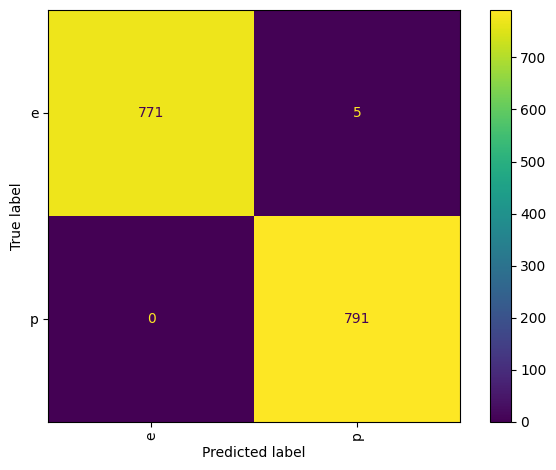

In [ ]:
#@title Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    rf_best, X_test, y_test, display_labels=encoders['class'], xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

In [ ]:
#@title Guardar modelo

# Guardar el modelo entrenado
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_best, file)

# Cargar el modelo guardado
with open('random_forest_model.pkl', 'rb') as file:
    rf_loaded = pickle.load(file)

# Verificar que se cargó correctamente
print(rf_loaded.predict(X_test))


[0 1 0 ... 1 1 1]


##SVM (svc)


In [ ]:
#@title Fit
# Escalar datos, ya que SVM es sensible a las escalas
scaler = StandardScaler()
svc = SVC(random_state=42)

# Definir hiperparámetros para optimización
params = {
    'svc__C': [0.1, 1, 10],  # Parámetro de regularización
    'svc__kernel': ['linear', 'rbf'],  # Tipo de kernel
    'svc__gamma': ['scale']
}

cv = 3
verbose = 1

# Crear pipeline para normalizar antes de aplicar SVC
pipeline = Pipeline([
    ('scaler', scaler),
    ('svc', svc)
])

# GridSearchCV para encontrar la mejor configuración
grid_search = GridSearchCV(
    pipeline, params, cv=cv, verbose=verbose, n_jobs=-1, scoring='f1_macro'
)

# Ajustar el modelo con los datos
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado
svc_b = grid_search.best_estimator_

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Mejores hiperparámetros: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


In [ ]:
#@title Accuracy score
y_pred = svc_b.predict(X_test)
accuracy_score(y_test, y_pred)


0.9974473516273133

In [ ]:
#@title Classificasion report
print(classification_report(y_test, y_pred, target_names=encoders['class']))

              precision    recall  f1-score   support

           e       1.00      0.99      1.00       776
           p       0.99      1.00      1.00       791

    accuracy                           1.00      1567
   macro avg       1.00      1.00      1.00      1567
weighted avg       1.00      1.00      1.00      1567



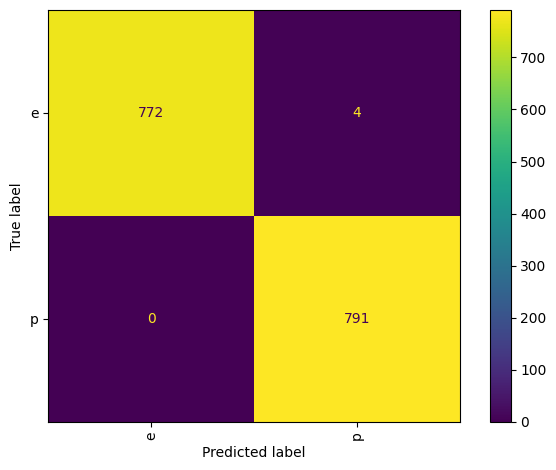

In [ ]:
#@title Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    svc_b, X_test, y_test, display_labels=encoders['class'], xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

In [ ]:
#@title Guardar modelo

# Guardar el modelo entrenado
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svc_b, file)

# Cargar el modelo guardado
with open('svm_model.pkl', 'rb') as file:
    svm_loaded = pickle.load(file)

# Verificar que se cargó correctamente
print(svm_loaded.predict(X_test))


[0 1 0 ... 1 1 1]


##Naive Bayes (nb)

In [ ]:
#@title Fit

nb = GaussianNB()

params = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}

cv = 5
verbose = 1

grid_search = GridSearchCV(
    nb, params, cv=cv, verbose=verbose, n_jobs=-1, scoring='f1_macro'
)

# Ajustar el modelo con los datos
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado
nb_b = grid_search.best_estimator_

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)



Fitting 5 folds for each of 6 candidates, totalling 30 fits
Mejores hiperparámetros: {'var_smoothing': 1e-09}


In [ ]:
#@title Accuracy score
y_pred = nb_b.predict(X_test)
accuracy_score(y_test, y_pred)


0.8602425015954053

In [ ]:
#@title Classificasion report
print(classification_report(y_test, y_pred, target_names=encoders['class']))

              precision    recall  f1-score   support

           e       0.81      0.94      0.87       776
           p       0.93      0.78      0.85       791

    accuracy                           0.86      1567
   macro avg       0.87      0.86      0.86      1567
weighted avg       0.87      0.86      0.86      1567



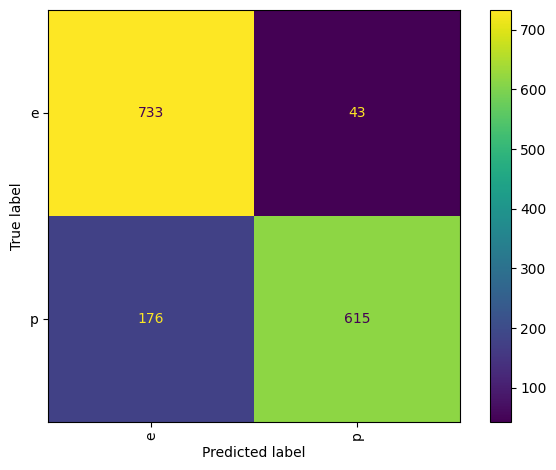

In [ ]:
#@title Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    nb_b, X_test, y_test, display_labels=encoders['class'], xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

##KNN (knn)


In [ ]:
scaler = StandardScaler()

knn = KNeighborsClassifier(n_jobs=-1)

params = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan'],
}

cv = 3
verbose = 1
n_iter = 8

pipeline = Pipeline([
    ('scaler', scaler),
    ('knn', knn)
])


random_search = RandomizedSearchCV(
    pipeline, params, cv=cv, verbose=verbose, n_jobs=-1, scoring='f1_macro', n_iter=n_iter, random_state=42
)

random_search.fit(X_train, y_train)

knn_best = random_search.best_estimator_

print("Mejores hiperparámetros:", random_search.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Mejores hiperparámetros: {'knn__weights': 'distance', 'knn__n_neighbors': 5, 'knn__metric': 'manhattan'}


In [ ]:
#@title Accuracy score
y_pred = knn_best.predict(X_test)
accuracy_score(y_test, y_pred)


0.9974473516273133

In [ ]:
#@title Classificasion report
print(classification_report(y_test, y_pred, target_names=encoders['class']))

              precision    recall  f1-score   support

           e       1.00      0.99      1.00       776
           p       0.99      1.00      1.00       791

    accuracy                           1.00      1567
   macro avg       1.00      1.00      1.00      1567
weighted avg       1.00      1.00      1.00      1567



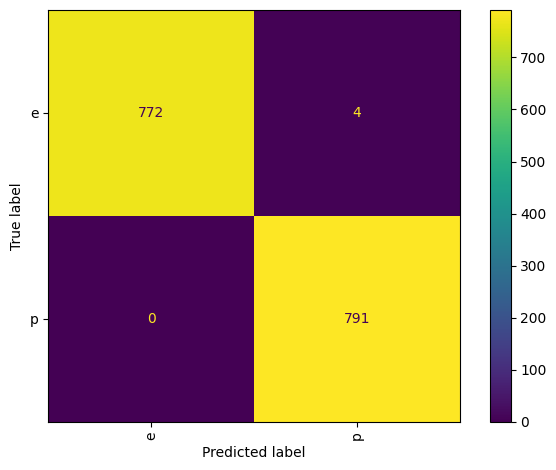

In [ ]:
#@title Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    knn_best, X_test, y_test, display_labels=encoders['class'], xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

In [ ]:
#@title Guardar modelo

# Guardar el modelo entrenado
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn_best, file)

# Cargar el modelo guardado
with open('knn_model.pkl', 'rb') as file:
    knn_loaded = pickle.load(file)

# Verificar que se cargó correctamente
print(knn_loaded.predict(X_test))


[0 1 0 ... 1 1 1]


#Logitic Regresion (lr)

In [ ]:
scaler = StandardScaler()

lr = LogisticRegression(max_iter=1000)  # Se aumenta el número de iteraciones para estabilidad

params = {
    'lr__C': [ 0.01, 0.1, 1, 10],
    'lr__penalty': ['l1', 'l2', 'elasticnet'],
    'lr__solver': [ 'saga'],
    'lr__l1_ratio': [0.5]
}

cv = 5
verbose = 1

pipeline = Pipeline([
    ('scaler', scaler),
    ('lr', lr)
])

grid_search = GridSearchCV(
    pipeline, params, cv=cv, verbose=verbose, n_jobs=-1, scoring='f1_macro'
)


grid_search.fit(X_train, y_train)

lr_best = grid_search.best_estimator_

print("Mejores hiperparámetros:", grid_search.best_params_)




Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores hiperparámetros: {'lr__C': 1, 'lr__l1_ratio': 0.5, 'lr__penalty': 'l1', 'lr__solver': 'saga'}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


In [ ]:
#@title Accuracy score
y_pred = lr_best.predict(X_test)
accuracy_score(y_test, y_pred)


0.8506700701978303

In [ ]:
#@title Classificasion report
print(classification_report(y_test, y_pred, target_names=encoders['class']))

              precision    recall  f1-score   support

           e       0.82      0.90      0.86       776
           p       0.89      0.81      0.84       791

    accuracy                           0.85      1567
   macro avg       0.85      0.85      0.85      1567
weighted avg       0.85      0.85      0.85      1567



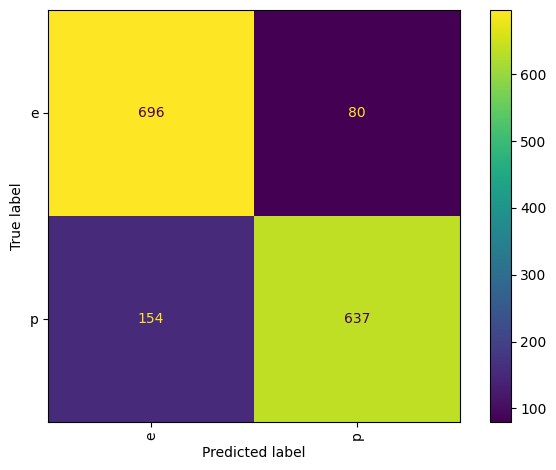

In [ ]:
#@title Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    lr_best, X_test, y_test, display_labels=encoders['class'], xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()